In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

In [2]:
import numpy as np
from BrainEmbeddingPhase2.B2BNet.debug_leave_one_utility \
    import LeaveOne

import matplotlib.pylab as plt
from scipy import stats  

experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

In [3]:
to_centroids_test = LeaveOne(experiment_path)

100%|██████████| 216/216 [00:00<00:00, 904.61it/s]


(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


In [4]:
universal_clusters_to_centroids,centroid_b_in_cluster= \
to_centroids_test.clusters_to_centroids_leave_none(is_diag=True)

[32, 47, 57, 61, 71]
[{32, 34, 67, 36, 70, 7, 43, 46, 53, 22, 87, 58}, {68, 10, 12, 44, 76, 47, 17, 18, 51, 52, 83, 54, 84, 25, 31}, {0, 8, 9, 13, 16, 19, 21, 24, 26, 29, 30, 39, 48, 50, 56, 57, 62, 66, 73, 74, 85}, {1, 2, 3, 11, 14, 15, 20, 23, 27, 28, 37, 38, 42, 55, 59, 60, 61, 63, 72, 75, 77, 78, 79, 81, 82, 86}, {64, 33, 65, 35, 4, 5, 6, 69, 40, 41, 71, 45, 80, 49}]
[15, 28, 29, 61, 81]
[{32, 2, 5, 70, 39, 73, 10, 74, 77, 15, 49, 51, 55, 57, 26, 59, 31}, {65, 4, 37, 38, 36, 69, 47, 18, 50, 28, 30}, {0, 67, 35, 6, 7, 9, 11, 44, 75, 52, 21, 53, 54, 29}, {34, 68, 40, 41, 72, 43, 78, 83, 20, 22, 24, 58, 27, 61}, {1, 3, 8, 12, 13, 14, 16, 17, 19, 23, 25, 33, 42, 45, 46, 48, 56, 60, 62, 63, 64, 66, 71, 76, 79, 80, 81, 82}]
is diag !


In [5]:
cluster_idx =3
b_idx = 4
cent_rep = centroid_b_in_cluster[cluster_idx][b_idx]

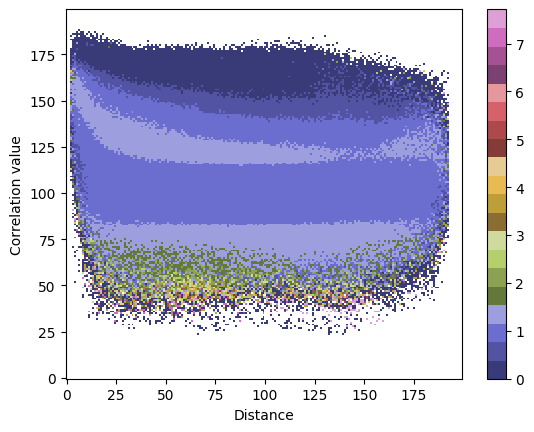

In [6]:
plt.clf() 
plt.imshow(cent_rep, cmap='tab20b', aspect="auto")
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('Distance')
plt.ylabel('Correlation value')
plt.show()

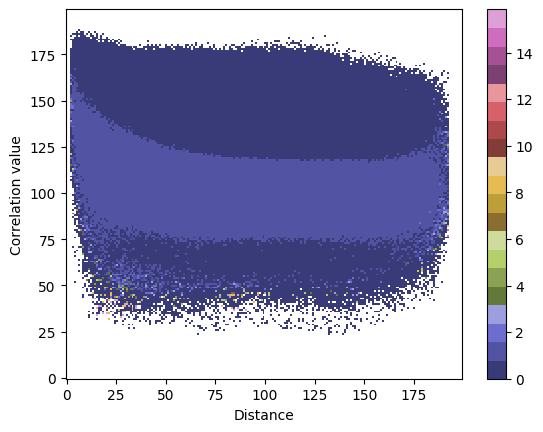

In [16]:
plt.clf() 
plt.imshow(to_centroids_test.leave_none['a1a3_local_centroids'][0], cmap='tab20b', aspect="auto")
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('Distance')
plt.ylabel('Correlation value')
plt.show()

In [7]:
cluster_idx =3
b_idx = 1
cent_rep = centroid_b_in_cluster[cluster_idx][b_idx]
stats.entropy(cent_rep[to_centroids_test.valid_positions ])

9.821037076297607

In [8]:
cluster_idx =3
b_idx = 4
cent_rep = centroid_b_in_cluster[cluster_idx][b_idx]
stats.entropy(cent_rep[to_centroids_test.valid_positions ])

9.820485140062077

In [9]:
to_centroids_test.leave_none['a1a3_closeness']

array([0.10592738, 0.11375529, 0.11752595, 0.10006043, 0.12159956,
       0.10045457, 0.11523948, 0.08846958, 0.07708718, 0.09345211,
       0.1401698 , 0.11630878, 0.12360897, 0.11675425, 0.12184748,
       0.10299441, 0.09040839, 0.10557777, 0.12493197, 0.09378114,
       0.13373899, 0.09092135, 0.10266286, 0.12535526, 0.09513128,
       0.11639991, 0.10234856, 0.13094622, 0.11958366, 0.06849578,
       0.09798424, 0.11331183, 0.09501513, 0.1205806 , 0.09238854,
       0.11435477, 0.10065266, 0.11948492, 0.10734691, 0.07846202,
       0.1297108 , 0.1056239 , 0.11504541, 0.10992209, 0.11958101,
       0.1208483 , 0.08728306, 0.112887  , 0.08051212, 0.10216773,
       0.08422992, 0.14323152, 0.12105111, 0.10931801, 0.12112903,
       0.13436697, 0.08920806, 0.08460043, 0.09994503, 0.11286581,
       0.1227017 , 0.11028577, 0.0729152 , 0.12524683, 0.10773665,
       0.12199288, 0.09481844, 0.10641357, 0.12857877, 0.12932212,
       0.09010192, 0.10805884, 0.10961906, 0.09686559, 0.08758

<Figure size 640x480 with 0 Axes>

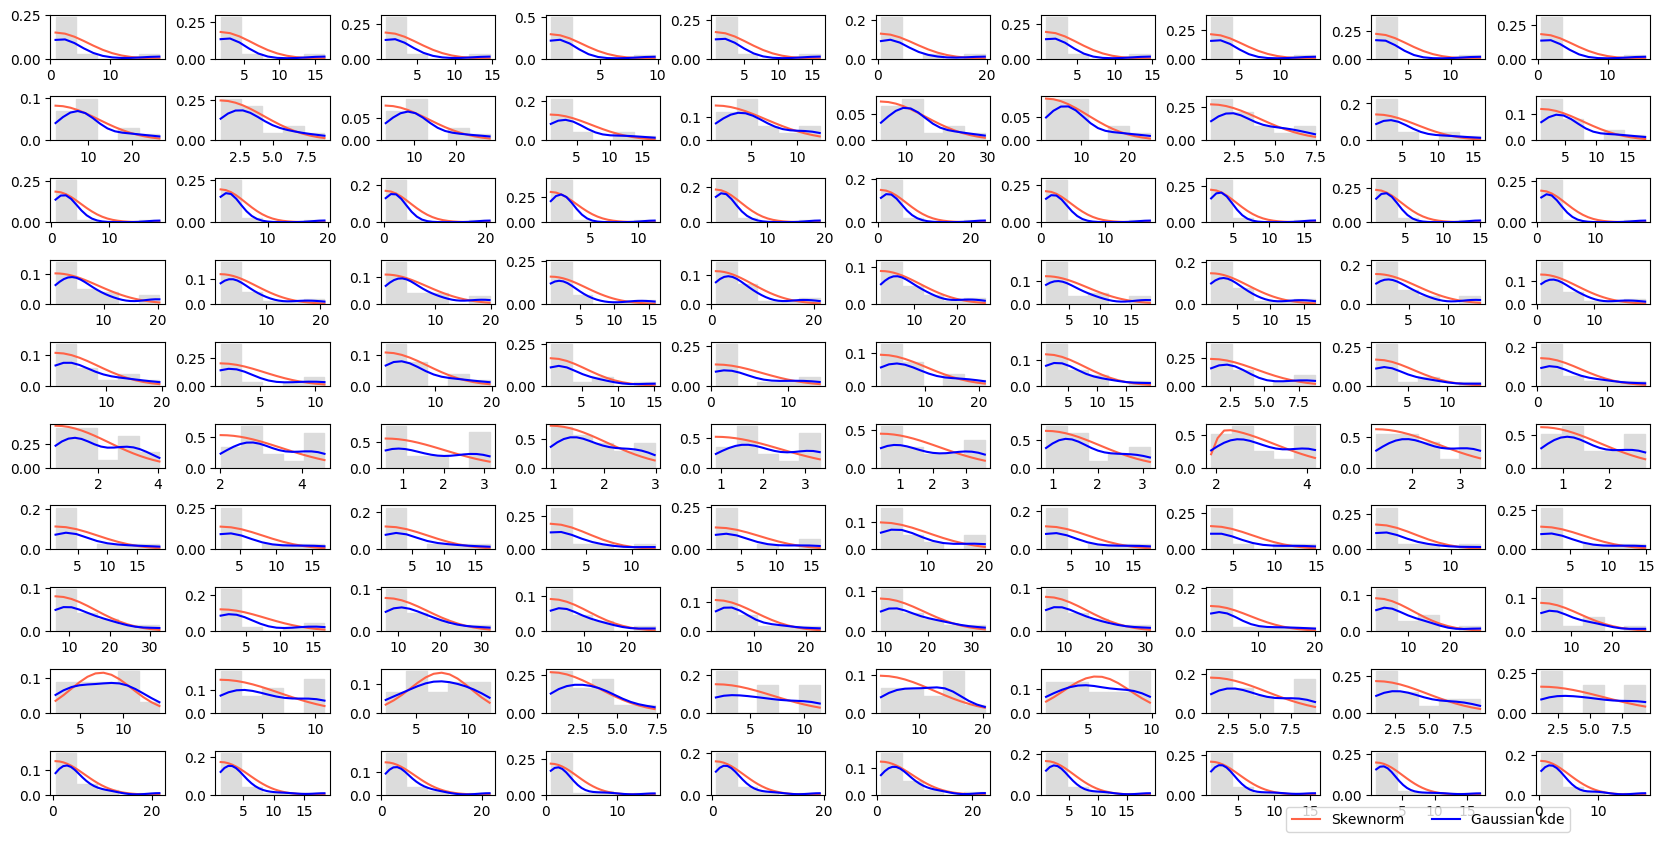

In [12]:

######to centroids
plt.figure()
# figsize=(200,100), dpi=100
len_clusters = len(universal_clusters_to_centroids)
fig, ax = plt.subplots(nrows=len_clusters, ncols=len_clusters, figsize=(20, 10))

divergence_mean_matrix = np.zeros((len_clusters,len_clusters))
for i in range(len_clusters):
    row = ax[i]
    for j in range(len_clusters):
        col = row[j]
        ser = universal_clusters_to_centroids[i][j]
        
        # divergence_mean_matrix[i][j] = np.mean(ser)

        # plot normed histogram
        col.hist(ser, density=True, bins=5, color = "gainsboro", ec="gainsboro")

        # find minimum and maximum of xticks, so we know
        # where we should compute theoretical distribution
        
        # xt = plt.xticks()[0]  
        xmin, xmax = min(ser), max(ser) 
        lnspc = np.linspace(xmin, xmax, len(ser))

        #lets try the normal distribution first
#         fitting_params = stats.norm.fit(ser) # get mean and standard deviation  
#         pdf_g = stats.norm.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
#         col.plot(lnspc, pdf_g, label="Norm", c='r') # plot it
        
#         fitting_params = stats.expon.fit(ser) # get mean and standard deviation  
#         pdf_g = stats.expon.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
#         col.plot(lnspc, pdf_g, label="Expon", c='y') # plot it
        fitting_params = stats.skewnorm.fit(ser) # get mean and standard deviation  
        pdf_g = stats.skewnorm.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
        col.plot(lnspc, pdf_g, label="Skewnorm", c='tomato') # plot it
        
        fitting_params = stats.gaussian_kde(ser) # get mean and standard deviation  
        pdf_g = fitting_params.pdf(lnspc) # now get theoretical values in our interval  
        col.plot(lnspc, pdf_g, label="Gaussian kde", c='b') # plot it
        
#         fitting_params = stats.gennorm.fit(ser) # get mean and standard deviation  
#         pdf_g = stats.genextreme.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
#         col.plot(lnspc, pdf_g, label="gennorm", c='r') # plot it
        
        # col.legend()
            
#         fitting_params = stats.lognorm.fit(ser) # get mean and standard deviation  
#         # pdf_g = stats.lognorm(*fitting_params)
#         pdf_g = stats.lognorm.pdf(lnspc, *fitting_params)
#         col.plot(lnspc, pdf_g, label="LogNorm") # plot it

#         fitting_params = stats.chi2.fit(ser) # get mean and standard deviation  
#         pdf_g = stats.chi2(*fitting_params)
#         col.plot(lnspc, pdf_g.pdf(lnspc), label="Chi2") # plot it

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)  # create some space below the plots by increasing the bottom-value
ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

plt.show()
#print(divergence_mean_matrix)

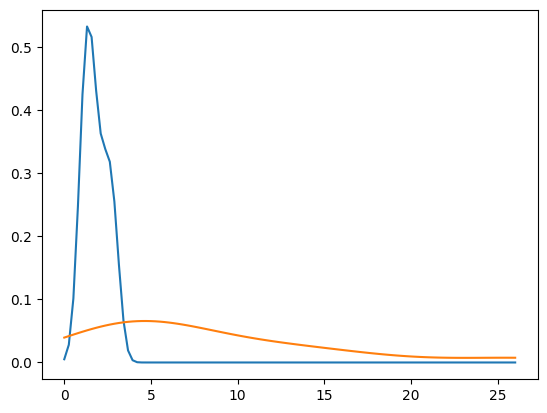

In [33]:
plt.figure()
# figsize=(200,100), dpi=100
len_clusters = len(universal_clusters_to_centroids)

divergence_mean_matrix = np.zeros((len_clusters,len_clusters))
for i in range(len_clusters):
    for j in range(len_clusters):
        if (i == 5 and j == 3) or (i == 7 and j == 3): 
            ser = universal_clusters_to_centroids[i][j]
        
            #xmin, xmax = min(ser), max(ser) 
            #lnspc = np.linspace(xmin, xmax, len(ser))
            #print(len(ser))
            #print(lnspc)
            lnspc=np.linspace(0, 26, 100)
            
#             fitting_params = stats.skewnorm.fit(ser) # get mean and standard deviation  
#             pdf_g = stats.skewnorm.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
#             plt.plot([0,30,30], pdf_g, label="Skewnorm", c='tomato') # plot it

            fitting_params = stats.gaussian_kde(ser) # get mean and standard deviation  
            pdf_g = fitting_params.pdf(lnspc) # now get theoretical values in our interval  
            plt.plot(lnspc, pdf_g, label="Gaussian kde") # plot it
plt.show()

In [15]:
universal_clusters_to_centroids[3][3]

[2.0229755187350307,
 2.501115849799273,
 3.782681649421899,
 0.9547230035916396,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 1.5381465578797817,
 0.9571775406469969,
 1.7989211099483118,
 12.721364087412075,
 0.9351367570208452,
 15.321545653864424,
 inf,
 3.2502884016636484,
 1.1422115925832819,
 2.8782234256669925,
 2.4004095766012576,
 4.553470262911354,
 inf,
 6.320592059065844,
 inf,
 inf]

<Figure size 640x480 with 0 Axes>

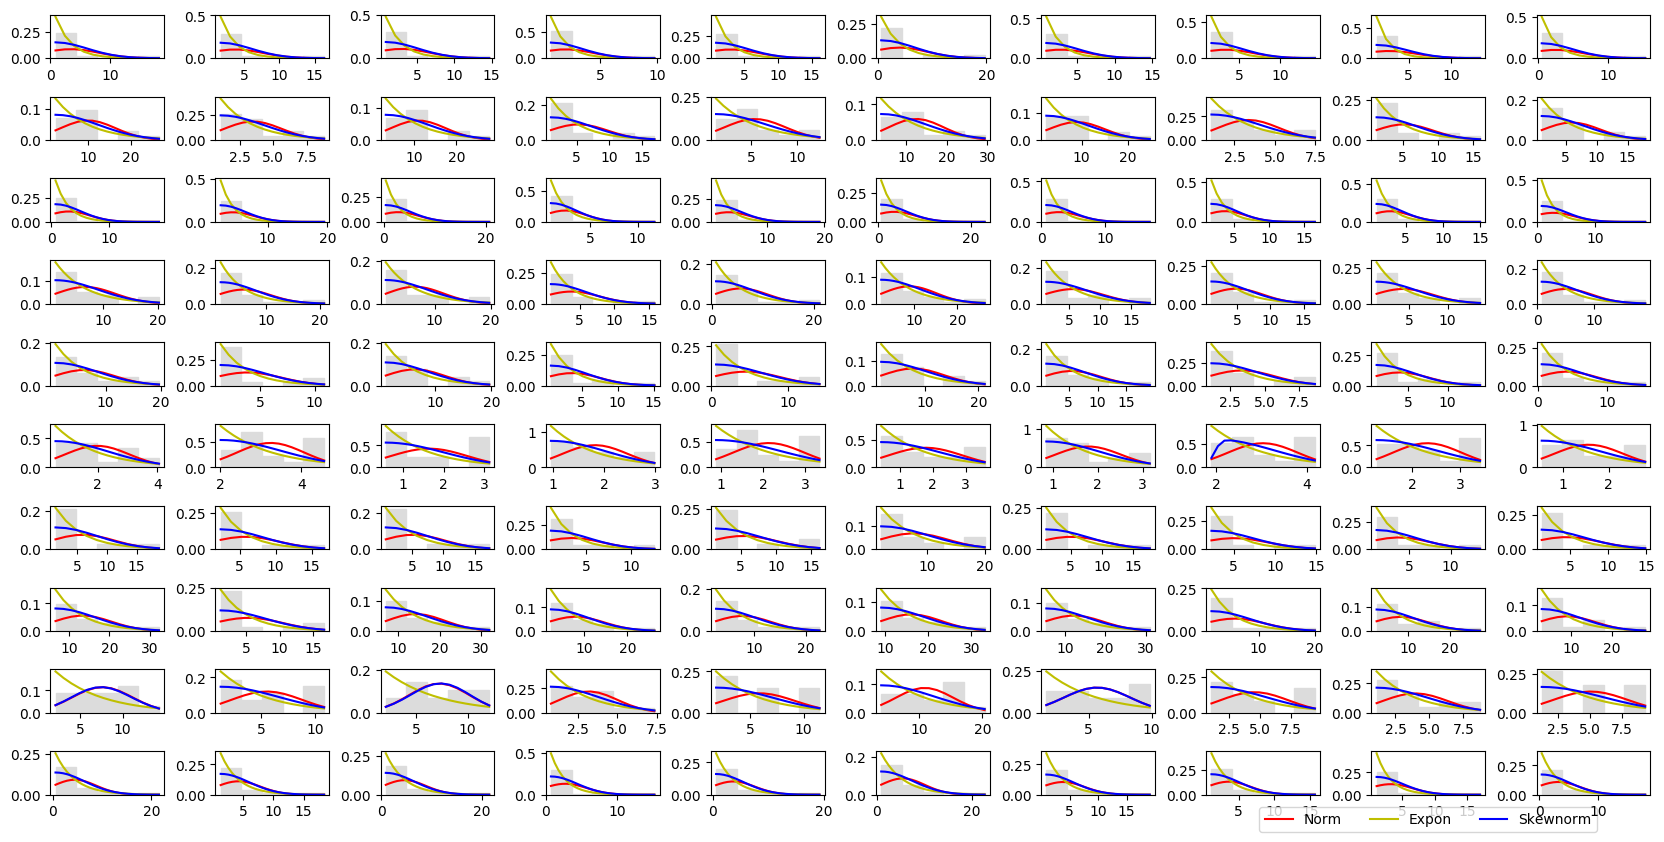

[[ 3.42927823  3.77244936  2.88239117  1.99697355  2.99753272  3.94295704
   2.78643583  3.35246018  2.64437836  2.48485578]
 [10.06375985  3.49041817 10.98966366  5.27882748  5.43842177 12.55175673
   8.94700101  3.3656494   5.21541839  5.98367244]
 [ 3.08434163  4.22552601  2.83893185  2.377162    3.17316479  3.48615593
   2.74696444  3.76327444  2.91212109  2.75810583]
 [ 6.66256597  5.79699413  6.46928291  3.79919271  5.71604556  8.85764166
   5.60460429  4.87797489  4.24078776  4.95936758]
 [ 6.15306343  3.8451026   6.45647244  3.69162004  4.53307824  7.74741665
   5.54473316  3.36011355  3.93480871  4.1962694 ]
 [ 1.98182503  3.23830617  1.64498099  1.82398903  2.13048793  1.78421488
   1.78770059  3.02858885  2.30785116  1.55981956]
 [ 5.9189093   5.86623292  5.21300585  3.37786627  5.35879283  7.64427141
   5.06480657  5.08926696  3.79704779  4.48348192]
 [13.39826942  5.3385455  14.24593069  8.0643953   7.64480577 16.1078309
  12.22892333  5.74791935  8.11581745  8.98909665]
 

In [5]:

######to centroids
plt.figure()
# figsize=(200,100), dpi=100
len_clusters = len(universal_clusters_to_centroids)
fig, ax = plt.subplots(nrows=len_clusters, ncols=len_clusters, figsize=(20, 10))

divergence_mean_matrix = np.zeros((len_clusters,len_clusters))
for i in range(len_clusters):
    row = ax[i]
    for j in range(len_clusters):
        col = row[j]
        ser = universal_clusters_to_centroids[i][j]
        
        divergence_mean_matrix[i][j] = np.mean(ser)

        # plot normed histogram
        col.hist(ser, density=True, bins=5, color = "gainsboro", ec="gainsboro")

        # find minimum and maximum of xticks, so we know
        # where we should compute theoretical distribution
        
        # xt = plt.xticks()[0]  
        xmin, xmax = min(ser), max(ser) 
        lnspc = np.linspace(xmin, xmax, len(ser))

        #lets try the normal distribution first
        fitting_params = stats.norm.fit(ser) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
        col.plot(lnspc, pdf_g, label="Norm", c='r') # plot it
        
        fitting_params = stats.expon.fit(ser) # get mean and standard deviation  
        pdf_g = stats.expon.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
        col.plot(lnspc, pdf_g, label="Expon", c='y') # plot it
            
        fitting_params = stats.skewnorm.fit(ser) # get mean and standard deviation  
        pdf_g = stats.skewnorm.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
        col.plot(lnspc, pdf_g, label="Skewnorm", c='b') # plot it
        
#         fitting_params = stats.gennorm.fit(ser) # get mean and standard deviation  
#         pdf_g = stats.genextreme.pdf(lnspc, *fitting_params) # now get theoretical values in our interval  
#         col.plot(lnspc, pdf_g, label="gennorm", c='r') # plot it
        
        # col.legend()
            
#         fitting_params = stats.lognorm.fit(ser) # get mean and standard deviation  
#         # pdf_g = stats.lognorm(*fitting_params)
#         pdf_g = stats.lognorm.pdf(lnspc, *fitting_params)
#         col.plot(lnspc, pdf_g, label="LogNorm") # plot it

#         fitting_params = stats.chi2.fit(ser) # get mean and standard deviation  
#         pdf_g = stats.chi2(*fitting_params)
#         col.plot(lnspc, pdf_g.pdf(lnspc), label="Chi2") # plot it

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)  # create some space below the plots by increasing the bottom-value
ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

plt.show()
print(divergence_mean_matrix)

In [7]:
import pandas as pd
df_divergence_mean_matrix = pd.DataFrame(divergence_mean_matrix)

In [9]:
prefix = '/media/sophie/'
df_divergence_mean_matrix.to_excel(prefix+experiment_path+"leave_none_skewnorm_diver_mean_diag_fit_replaced.xlsx")

In [10]:
divergence_median_matrix = np.zeros((len_clusters,len_clusters))
for i in range(len_clusters):
    #row = ax[i]
    for j in range(len_clusters):
        #col = row[j]
        ser = universal_clusters_to_centroids[i][j]
        
        divergence_median_matrix[i][j] = np.median(ser)
df_divergence_median_matrix = pd.DataFrame(divergence_median_matrix)
prefix = '/media/sophie/'
df_divergence_mean_matrix.to_excel(prefix+experiment_path+"leave_none_skewnorm_diver_median_diag_fit_replaced.xlsx")

In [6]:
np.shape(np.concatenate([
    centroid_test.leave_none['typical_local_centroids'],
    centroid_test.leave_none['a1a3_local_centroids']
]))

(10, 200, 200)

In [3]:
leave_none_test = LeaveOne(experiment_path)
prob_a1a3_in_a1a3, prob_a1a3_in_typical,\
prob_typical_in_a1a3, prob_typical_in_typical = leave_none_test.leave_none_test()

100%|██████████| 216/216 [00:00<00:00, 906.93it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/latent_group_utility.py:52: RuntimeWarning: divide by zero encountered in log
  np.log(norm_distribution.pdf(diver_x_set_cent_b2[subject_index, centroid_index]))


In [4]:
to_typical_max, to_a1a3_max =  leave_none_test.get_max_prob(
    prob_a1a3_in_a1a3, prob_a1a3_in_typical, prob_typical_in_a1a3, prob_typical_in_typical)

In [5]:
import pandas as pd

In [10]:
data = {'prob_a1a3_in_a1a3': prob_a1a3_in_a1a3,
        'prob_a1a3_in_typical': prob_a1a3_in_typical,
        'prob_typical_in_a1a3': prob_typical_in_a1a3,
        'prob_typical_in_typical' :prob_typical_in_typical
       }

In [6]:
np.shape(prob_a1a3_in_a1a3)

(88, 5)

In [7]:
prob_a1a3_in_universal = np.concatenate((prob_a1a3_in_a1a3, prob_a1a3_in_typical), axis=1)

In [8]:
np.shape(prob_a1a3_in_universal)

(88, 10)

In [9]:
prob_typical_in_universal = np.concatenate((prob_typical_in_a1a3, prob_typical_in_typical), axis=1)

In [10]:
np.shape(prob_typical_in_universal)

(84, 10)

In [11]:
df_prob_a1a3_in_universal = pd.DataFrame(prob_a1a3_in_universal)
df_prob_typical_in_universal = pd.DataFrame(prob_typical_in_universal)

In [12]:
prefix = '/media/sophie/'
with pd.ExcelWriter(prefix+experiment_path+"leave_none_prob.xlsx") as writer:  # doctest: +SKIP
    df_prob_a1a3_in_universal.to_excel(writer, sheet_name='prob_a1a3_in_universal') 
    df_prob_typical_in_universal.to_excel(writer, sheet_name='prob_typical_in_universal') 

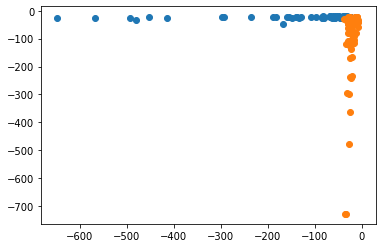

In [6]:
import matplotlib.pyplot as plt
plt.scatter(to_typical_max[:84], to_a1a3_max[:84] )
plt.scatter(to_typical_max[84:], to_a1a3_max[84:] )
plt.show()

In [5]:
leave_none_test.leave_one_regression_sort(to_typical_sort, to_a1a3_sort)

100%|██████████| 172/172 [00:01<00:00, 150.16it/s]


{'mean_score': 0.953794369645043,
 'accurate_count': 162,
 'f1_score': 0.9411764705882352}

In [6]:
leave_none_test.leave_one_regression_max(to_typical_max, to_a1a3_max)

100%|██████████| 172/172 [00:00<00:00, 278.61it/s]


{'mean_score': 0.9365225078199374,
 'accurate_count': 161,
 'f1_score': 0.935672514619883}

In [7]:
leave_one_test = LeaveOne(experiment_path)
to_typical_max, to_a1a3_max, to_typical_sort, to_a1a3_sort = leave_one_test.leave_one_test()

100%|██████████| 216/216 [00:00<00:00, 896.23it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3
  0%|          | 0/172 [00:00<?, ?it/s]

(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/latent_group_utility.py:52: RuntimeWarning: divide by zero encountered in log
  np.log(norm_distribution.pdf(diver_x_set_cent_b2[subject_index, centroid_index]))
100%|██████████| 172/172 [04:34<00:00,  1.63s/it]


In [8]:
leave_one_test.leave_one_regression_sort(to_typical_sort, to_a1a3_sort, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 172.33it/s]


{'mean_score': 0.5936352509179927,
 'accurate_count': 95,
 'f1_score': 0.4210526315789474}

In [9]:
leave_one_test.leave_one_regression_max(to_typical_max, to_a1a3_max, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 301.52it/s]


{'mean_score': 0.526689786481708,
 'accurate_count': 86,
 'f1_score': 0.17307692307692304}

<Figure size 640x480 with 0 Axes>

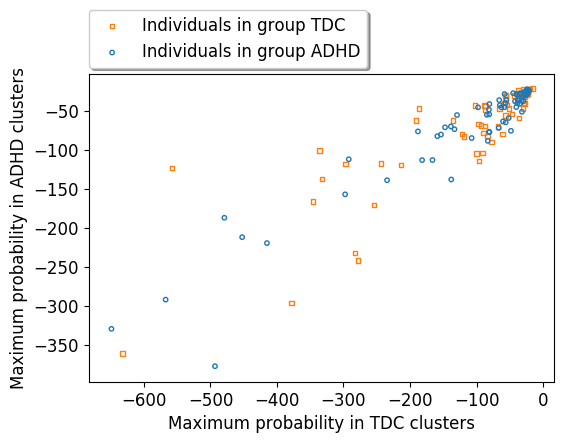

In [10]:
import matplotlib.pyplot as plt  
plt.clf()
plt.figure(figsize=(6, 4))
plt.scatter(to_typical_max[88:], 
            to_a1a3_max[88:], 
            label='Individuals in group TDC', s=10,
            facecolors='none',
            edgecolors='tab:orange',
            marker='s')
plt.scatter(to_typical_max[:88], 
            to_a1a3_max[:88], 
            label='Individuals in group ADHD', s=10,
            facecolors='none',
            edgecolors='tab:blue',
            marker='o')

plt.tick_params(labelsize=12)
plt.ylabel('Maximum probability in ADHD clusters', fontsize=12)
plt.xlabel('Maximum probability in TDC clusters', fontsize=12)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
           borderaxespad=0,
           shadow=True, fancybox=True, fontsize=12)
plt.show()

In [15]:
np.shape(to_typical_max)

(172, 1)

In [20]:
prefix = '/media/sophie/'
np.save(prefix+experiment_path+'leave_one_to_typical_max',to_typical_max) 
np.save(prefix+experiment_path+'leave_one_to_a1a3_max',to_a1a3_max) 
np.save(prefix+experiment_path+'leave_one_to_typical_sort',to_typical_sort)
np.save(prefix+experiment_path+'leave_one_to_a1a3_sort',to_a1a3_sort)

In [6]:
prefix = '/media/sophie/'
leave_one_to_typical_max = np.load(prefix+experiment_path+'leave_one_to_typical_max.npy')

In [7]:
leave_one_to_a1a3_max = np.load(prefix+experiment_path+'leave_one_to_a1a3_max.npy')

In [8]:
leave_one_to_typical_max

array([[ -28.20822071],
       [ -55.854597  ],
       [ -81.10648609],
       [-220.18889816],
       [         -inf],
       [ -27.6520617 ],
       [ -27.12616379],
       [ -38.61535421],
       [ -89.30672894],
       [ -65.5814963 ],
       [-450.43222708],
       [ -28.35068371],
       [ -71.94832301],
       [         -inf],
       [ -36.75328582],
       [         -inf],
       [ -41.84840033],
       [         -inf],
       [ -29.09217237],
       [-157.763815  ],
       [-191.20624716],
       [ -77.73377649],
       [ -29.71856   ],
       [-112.77702982],
       [ -37.05120721],
       [ -27.51823059],
       [ -59.95362978],
       [ -41.18394865],
       [ -29.28764883],
       [ -31.43914785],
       [ -46.02223434],
       [ -73.73031014],
       [ -28.7561903 ],
       [-138.84512028],
       [ -25.96485062],
       [-378.06138483],
       [ -43.45964882],
       [ -38.57306769],
       [ -28.82310713],
       [ -52.06675861],
       [-113.35858263],
       [ -40.724